In [1]:
import pandas as pd 
import os 

filepath = '/Users/olivialawinski/IKT/analytics/Semesterabgabe/ikt-semesterabgabe/combined_dataset_sorted.csv'
messdaten = pd.read_csv(filepath, sep=';', on_bad_lines='skip')
messdaten

,EPOCH_TIME,DEVICE_NAME,SENSOR_TYPE,MEASUREMENT_VALUE,GPS_LAT,GPS_LONG,SOURCE_FOLDER
0,#[EPOCH_TIME],[DEVICE_NAME],[SENSOR_TYPE],[MEASUREMENT_VALUE],NaN,NaN,bumpy_roads
1,1629745197972,LOCAL_PHONE,Y,42,NaN,NaN,bumpy_roads
2,1629745197972,LOCAL_PHONE,80,SL_0,NaN,NaN,bumpy_roads
3,1629745197972,LOCAL_PHONE,83,RT_O,NaN,NaN,bumpy_roads
4,1629745197972,LOCAL_PHONE,81,RS_N,NaN,NaN,bumpy_roads
...,...,...,...,...,...,...,...
424235,1630527720257,LOCAL_PHONE,20,"-0.72,0.05,0.0",NaN,NaN,flat_streets
424236,1630527720266,LOCAL_PHONE,20,"-0.64,0.06,-0.19",NaN,NaN,flat_streets
424237,1630527720276,LOCAL_PHONE,20,"-0.72,0.1,0.2",NaN,NaN,flat_streets
424238,1630527720286,LOCAL_PHONE,20,"-0.7,-0.03,0.05",NaN,NaN,flat_streets


In [2]:
messdaten['SENSOR_TYPE'] = pd.to_numeric(messdaten['SENSOR_TYPE'],errors = 'coerce')

# Filtern nach 20 
filtered_data = messdaten[messdaten['SENSOR_TYPE']== 20]

# aus der Spalte MEASUREMENT_VALUE den z-Wert extrahieren 
def extract_z_value(item):
    if isinstance(item,str) and "," in item:
        item = item.split(",")
        if len(item) == 3:
            return item[2]
    else:
        return item

In [4]:
# neue Spalte erstellen und die z-Werte dort speichern 
filtered_data.loc[:, "Z_VALUE"] = filtered_data["MEASUREMENT_VALUE"].map(extract_z_value)
filtered_data.sample(10)

,EPOCH_TIME,DEVICE_NAME,SENSOR_TYPE,MEASUREMENT_VALUE,GPS_LAT,GPS_LONG,SOURCE_FOLDER,Z_VALUE
184625,1630854307582,LOCAL_PHONE,20.0,"0.45,0.06,-0.92",NaN,NaN,cobblestone_street,-0.92
177395,1630854235989,LOCAL_PHONE,20.0,"-1.0,-0.04,-0.67",NaN,NaN,cobblestone_street,-0.67
24209,1630850458830,LOCAL_PHONE,20.0,"-0.41,-0.27,0.23",NaN,NaN,bumpy_roads,0.23
287001,1629227796474,LOCAL_PHONE,20.0,"0.39,0.12,0.3",NaN,NaN,flat_streets,0.3
24275,1630850459490,LOCAL_PHONE,20.0,"0.6,0.29,-0.96",NaN,NaN,bumpy_roads,-0.96
132450,1630853777452,LOCAL_PHONE,20.0,"2.61,-0.24,1.08",NaN,NaN,cobblestone_street,1.08
300316,1629227926623,LOCAL_PHONE,20.0,"-0.12,-0.05,0.34",NaN,NaN,flat_streets,0.34
154420,1630853997710,LOCAL_PHONE,20.0,"-0.09,-0.47,0.97",NaN,NaN,cobblestone_street,0.97
17756,1629745675273,LOCAL_PHONE,20.0,"1.06,-0.4,0.52",NaN,NaN,bumpy_roads,0.52
102198,1629226835903,LOCAL_PHONE,20.0,"0.27,0.17,-0.04",NaN,NaN,cobblestone_street,-0.04


In [5]:
filtered_data = filtered_data.drop(columns = ['DEVICE_NAME','GPS_LAT','GPS_LONG','MEASUREMENT_VALUE','EPOCH_TIME'])
filtered_data

,SENSOR_TYPE,SOURCE_FOLDER,Z_VALUE
9,20.0,bumpy_roads,-0.56
10,20.0,bumpy_roads,0.16
11,20.0,bumpy_roads,-1.04
12,20.0,bumpy_roads,-0.4
13,20.0,bumpy_roads,0.08
...,...,...,...
424235,20.0,flat_streets,0.0
424236,20.0,flat_streets,-0.19
424237,20.0,flat_streets,0.2
424238,20.0,flat_streets,0.05


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Auswahl der Merkmale
features = ['Z_VALUE']
X = filtered_data[features]
y = filtered_data['SOURCE_FOLDER']

# Aufteilen der Daten in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisieren der Daten
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trainieren des k-NN Modells
k = 5  # Beispielwert für k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = knn.predict(X_test)

# Evaluierung des Modells
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.5493224690798053
Classification Report:
                    precision    recall  f1-score   support

       bumpy_roads       0.10      0.07      0.08     11693
cobblestone_street       0.46      0.49      0.48     42410
      flat_streets       0.65      0.67      0.66     69360

          accuracy                           0.55    123463
         macro avg       0.41      0.41      0.41    123463
      weighted avg       0.54      0.55      0.54    123463



In [8]:
from sklearn.model_selection import GridSearchCV

# Definition des k-NN Modells
knn = KNeighborsClassifier()

# Parameterbereich für Grid Search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Grid Search mit Cross-Validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Beste Parameter
best_params = grid_search.best_params_
print(f"Beste Parameter: {best_params}")

# Modell mit den besten Parametern trainieren
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

# Vorhersagen und Evaluierung
y_pred_best = knn_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print(f'Improved Accuracy: {accuracy_best}')
print(f'Improved Classification Report:\n{report_best}')

Beste Parameter: {'n_neighbors': 11, 'weights': 'uniform'}
Improved Accuracy: 0.6117298299895515
Improved Classification Report:
                    precision    recall  f1-score   support

       bumpy_roads       0.11      0.01      0.02     11693
cobblestone_street       0.54      0.44      0.49     42410
      flat_streets       0.65      0.82      0.72     69360

          accuracy                           0.61    123463
         macro avg       0.43      0.42      0.41    123463
      weighted avg       0.56      0.61      0.57    123463



In [9]:
messdaten.describe()

,SENSOR_TYPE,GPS_LAT,GPS_LONG
count,422546.000000,1557.000000,1557.000000
mean,20.006458,52.532597,13.511393
std,3.042489,0.014243,0.058496
min,10.000000,52.507976,13.432752
25%,20.000000,52.522276,13.457362
50%,20.000000,52.533475,13.505187
75%,20.000000,52.543603,13.557366
max,83.000000,52.565450,13.635803


In [10]:
messdaten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424240 entries, 0 to 424239
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EPOCH_TIME         424240 non-null  object 
 1   DEVICE_NAME        424240 non-null  object 
 2   SENSOR_TYPE        422546 non-null  float64
 3   MEASUREMENT_VALUE  424240 non-null  object 
 4   GPS_LAT            1557 non-null    float64
 5   GPS_LONG           1557 non-null    float64
 6   SOURCE_FOLDER      424240 non-null  object 
dtypes: float64(3), object(4)
memory usage: 22.7+ MB


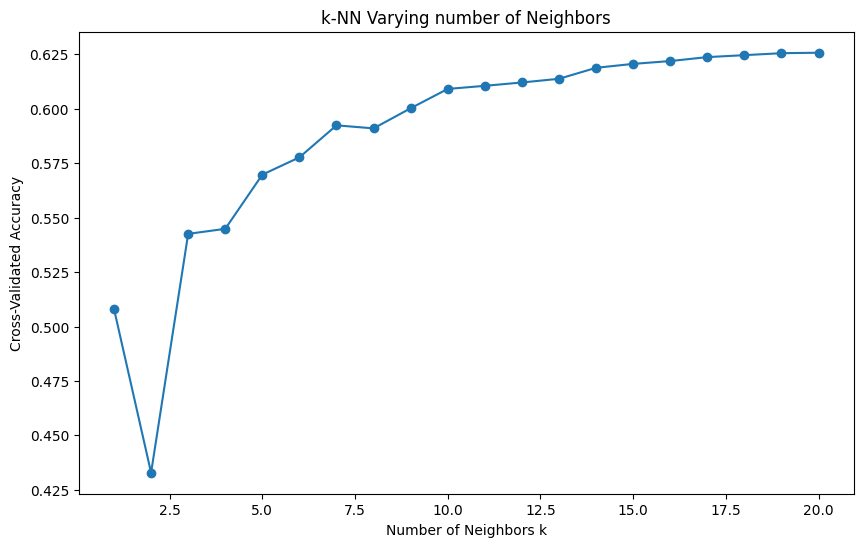

Beste Anzahl von Nachbarn: 20


In [14]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Liste der k-Werte, die getestet werden sollen
k_values = range(1, 21)
cv_scores = []

# Durchführen der Cross-Validation für jeden k-Wert
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotten der Cross-Validation-Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Varying number of Neighbors')
plt.show()

# Finden des besten k-Wertes
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Beste Anzahl von Nachbarn: {best_k}')


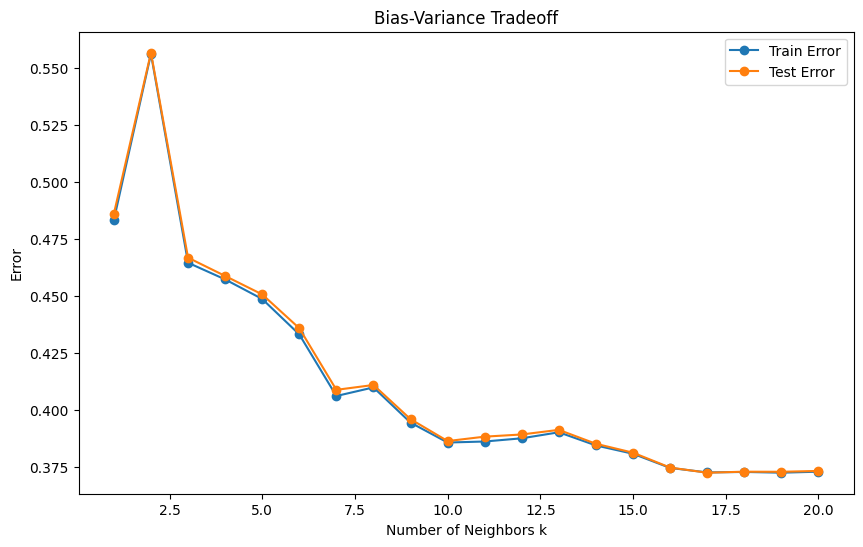

In [15]:
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(X_train, y_train)
    
    train_error = 1 - knn.score(X_train, y_train)
    test_error = 1 - knn.score(X_test, y_test)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotten der Fehler
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, marker='o', label='Train Error')
plt.plot(k_values, test_errors, marker='o', label='Test Error')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()